# Data Science for Consulting

## Develop Recommendation Engine for Books E-Commerce Website
### Built a customer segmentation k-means algorithm and recommended marketing campaigns for each customer segment. The analysis was used to retain existing high-ticket customers and increase sales for reluctant customers

### Amro Shanshal


1. Performed descriptive statistics on all variables to help understand the data, the distributions and basic info you have to work with on this challenge. (Mean, Standard Deviation, Median, Min, Max and Histogram)

2. Created a new data set with more descriptive labels and the data needed for analysis

3. Used the SMART framework – use hypothetical data and goals for the improvement your Recommendation Engine will deliver

4. Selected from a pool of titles and roles within the company to create a core team (Maximum 6-8 members) to perform the analysis and develop the pitch to your CMO. (Pool: VP Finance, Data Engineer, SVP Data Scientist, Financial Analyst, Customer Satisfaction Manager, Website Analyst, Webmaster, VP Marketing, Performance Marketing SEM/SEO Analyst, Customer Retention Manager, Marketing Manager, Customer Research Analyst, Data Visualization Specialist, Sr. Data Scientist, Marketing Analytics Manager, IT Manager for Ecommerce Data Storage, Marketing Messaging/Creative Designer, Ecommerce Financial Manager)

5. Described the team strengths and discipline focus areas that justify your need for each person and why this talent will be necessary for your success. This justification is intended to both motivate the team members and gain support from their managers to join your team.


6. Chose “unsupervised” approach to segment/cluster current customers using the data provided. A MECE (Mutually Exclusive, Comprehensively Exhaustive) and any record of any incoming customer must receive one score and become assigned to a single segment – even if the transaction is incomplete or abandoned prior to purchase.

In [ ]:
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

### Part 1 and 2. 
#### Perform descriptive statistics on all variables to help understand the data, the distributions and basic info you have to work with on this challenge. (Mean, Standard Deviation, Median, Min, Max and Histogram)

#### Create a new data set with more descriptive labels and the data needed for analysis

#### Import Data

In [7]:
df = pd.read_excel('Final Assignment Data Final.xlsx')

In [20]:
df.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [21]:
df.isnull().sum(axis = 0)

id                      0
logtarg             25402
r                       0
f                       0
m                       0
                    ...  
Mhobby40                0
Mnature41               0
Mencyclopaedia44        0
Mvideos50               0
Mnonbooks99             0
Length: 66, dtype: int64

In [8]:
# Drop logtarg
df = df.drop('logtarg', axis=1)

In [13]:
# Descriptive statistics
df.describe()

,id,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,3.371300e+04,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,...,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,8.234209e+06,508.427254,5.820603,251.924325,1296.088186,0.590900,0.228102,0.356480,0.104767,0.290659,...,29.095301,4.223431,21.147507,0.305226,0.020681,6.785558,3.728635,8.402428,6.020431,1.800973
std,4.426015e+06,542.440039,7.008049,3929.929826,818.976321,1.762201,0.865510,1.105653,0.527764,1.088606,...,2087.221131,19.975164,2898.452008,1.991675,0.501499,21.197488,15.007592,46.021881,19.643978,21.383867
min,9.140000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.391616e+06,117.000000,1.000000,39.899994,536.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.967691e+06,293.000000,3.000000,102.629944,1311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.199823e+07,712.000000,7.000000,247.297485,2132.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,18.899994,0.000000,2.500000,0.000000,0.000000,5.112919,0.000000,0.000000,0.000000,0.000000
max,1.625264e+07,2460.000000,118.000000,532892.000000,2462.000000,109.000000,29.000000,49.000000,22.000000,35.000000,...,383154.500000,820.563477,532182.000000,78.724670,21.448685,771.610840,735.354980,1999.150391,794.137695,2412.960938


### Rename columns and create new features

In [4]:
df.columns

Index(['id', 'r', 'f', 'm', 'tof', 'Ffiction1', 'Fclassics3', 'Fcartoons5',
       'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99', 'Mfiction1',
       'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8',
       'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17',
       'Mhistory19', 'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23',
       'Mcompsci26', 'Mrailroads27', 'Mmaps30', 'Mtravelguides31', 'Mhealth35',
       'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 'Msports39', 'Mhobby40',
       'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99'],
      dtyp

In [9]:
#rename the columns 

df.rename(columns={'r': 'NDays_LastPurchase', 'f': 'NPurchases','m': 'Past_AmountSpent','tof': 'TimeonFile'}, inplace=True)



In [10]:
# Number of book categories bought
df['total_categories'] = (df.loc[:, 'Ffiction1':'Fnonbooks99']).sum(axis = 1)
df['total_categories'] = df['total_categories'].fillna(0)

#average book purchase
df["BooksPerPurchase"]=df['total_categories']/df['NPurchases']
df['BooksPerPurchase'] = df['BooksPerPurchase'].fillna(0)


#amount spent per purchase
df["AmountPerPurchase"]=df['Past_AmountSpent']/df['NPurchases']
df['AmountPerPurchase'] = df['AmountPerPurchase'].fillna(0)

#get average cost per book
df["PerBookCost"]=df['Past_AmountSpent']/df['total_categories']
df['PerBookCost'] = df['PerBookCost'].fillna(0)

In [11]:
df

,id,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost
0,914,194,7,318.894775,1703,1,0,1,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,32,4.571429,45.556396,9.965462
1,957,3,14,368.052246,2364,1,0,2,0,0,...,0.0,61.176025,17.150269,10.0,0.000000,0.0,34,2.428571,26.289446,10.825066
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,35,2.333333,28.219889,12.094238
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,7,1.750000,17.804260,10.173863
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,0.0,17.895203,0.000000,0.0,61.799988,0.0,39,6.500000,73.773031,11.349697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33708,16061594,6,1,0.000000,6,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1,1.000000,0.000000,0.000000
33709,16062701,4,1,0.000000,4,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,1,1.000000,0.000000,0.000000
33710,16062981,5,1,22.949997,5,0,0,3,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,4,4.000000,22.949997,5.737499
33711,16063490,0,0,0.000000,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0,0.000000,0.000000,0.000000


In [12]:
# Types of columns
#Visualize data types

print(f"{df.dtypes}\n")

id                      int64
NDays_LastPurchase      int64
NPurchases              int64
Past_AmountSpent      float64
TimeonFile              int64
                       ...   
Mnonbooks99           float64
total_categories        int64
BooksPerPurchase      float64
AmountPerPurchase     float64
PerBookCost           float64
Length: 69, dtype: object



In [ ]:
ids= df['id']
ids

### Exploratory data analysis

In [202]:
# Create a barchart #Function to get single distribution graphs

def single_distr(column,df,title):
    sns.set()
    plt.figure(figsize=(12,18))
    sns.displot(df[column],bins=20)
    plt.title(title)

<Figure size 864x1296 with 0 Axes>

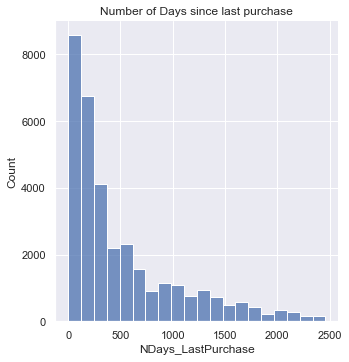

In [203]:
single_distr('NDays_LastPurchase',df,"Number of Days since last purchase")

<Figure size 864x1296 with 0 Axes>

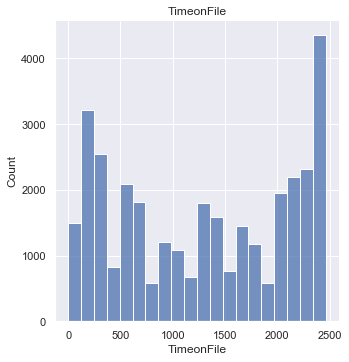

In [204]:
single_distr('TimeonFile',df,"TimeonFile")


<Figure size 864x1296 with 0 Axes>

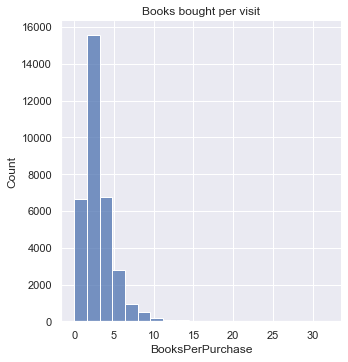

In [205]:
single_distr('BooksPerPurchase',df,"Books bought per visit")

<Figure size 864x1296 with 0 Axes>

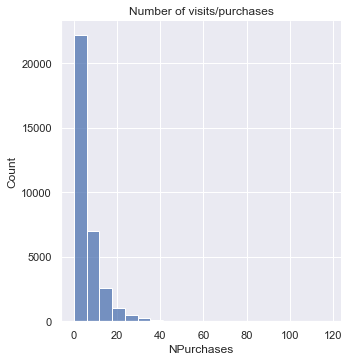

In [207]:
single_distr('NPurchases',df,"Number of visits/purchases")


### Part 3. 
#### Document the problem you will address using the SMART framework – use hypothetical data and goals for the improvement your Recommendation Engine will deliver


##### Problem: 
An ecommerce website currently recommends “most popular” items to all users with the hope that users will add items to their shopping cart and increase the size of each purchase. This approach is successful by increasing sales for the website and the current CMO/Webmaster do not believe there is a more intelligent solution that is more relevant to each users based on their prior purchases and relationship with the ecommerce website.

Develop a “Recommendation Engine” AI solution for a Website using an Unsupervised segmentation/clustering approach complete with economic analysis and presentation to management to convince the CMO and Webmaster to implement the solution

##### SMART goal: 
Develop a recommendation engine that is going to convince the CMO that there's a better solution than what he believes is best. This will be done by analyzing and segmenting customers data to provide them custom recommendations for items to add to their cart before checking out.

###### Specific: 
Increase customer spending rate by 12%, for target (segmented) customers that will each have a unique promotion or recommendations to increase their spending.

###### Measurable:
Measure progress by how many new items are added to segmented customers carts and total dollar value per cart.

###### Actionable: 
Make custom recommendations based on the clustering of the different types of customers. Each customer type will get a specific actionable label. These actionable labels are used for marketing purposes to increase customer spending.

###### Relevant:
Increasing customer spending will grow the company, increase my revenue and satisfy CMO and stakeholders.

###### Timebound: 
Increase customer spending rate by 1% each month. The goal is to increase base rate by overall 12% at the end of the fiscal year. 


### Part 4 and Part 5:

#### Select from a pool of titles and roles within the company to create a core team (Maximum 6-8 members) to perform the analysis and develop the pitch to your CMO. (Pool: VP Finance, Data Engineer, SVP Data Scientist, Financial Analyst, Customer Satisfaction Manager, Website Analyst, Webmaster, VP Marketing, Performance Marketing SEM/SEO Analyst, Customer Retention Manager, Marketing Manager, Customer Research Analyst, Data Visualization Specialist, Sr. Data Scientist, Marketing Analytics Manager, IT Manager for Ecommerce Data Storage, Marketing Messaging/Creative Designer, Ecommerce Financial Manager)

#### Describe the team strengths and discipline focus areas that justify your need for each person and why this talent will be necessary for your success. This justification is intended to both motivate the team members and gain support from their managers to join your team.

###### - VP Marketing:

Because the VP of Marketing reports directly to the CMO on the progress, its important to have the VP of Marketing on the team to oversee the project and provide frequent feedback. 


###### - Data Engineer:

Because the recommendation engine needs customer data, a data engineer is essential to maintain readily available data pipelines.


###### - Senior Data Scientist:

The entire project is based on building a recommendation engine which requires machine learning skills that a Senior data scientist is skilled at and can develop a great algorithm.

###### - Website Analyst:

Because the project is based off a website, a website analyst is paramount to the success of the project. The website analyst knows how customers interact with website and has metrics that are necessary during the analysis. In addition, its important to work with the Website Analyst during the solution and implementation phase. 


###### - Marketing Analytics Manager:

Because the nature of recommendation engine is related to marketing analytics, its necessary to have the MAM provide insights and have them updated on the progress because they report to VP of Marketing.



###### - Customer Research Analyst:

Background on the customers and their habits is necessary when developing a recommendation engine. Thus, a Customer Research Analyst will be the right person for this job.


###### - Customer Retention Manager:

Its important to have the CRM in the loop of this project and get their feedback because essentially they are the ones responsible to maintaining customers.



### Part 6

### Standardize the data

In [14]:
x = df.drop(["id"],1)   
y = df["id"]

In [15]:
def standardize(df):
    
    scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df))
    scaled_df.columns = df.columns
    scaled_df = scaled_df.fillna(0)
    
    
    return scaled_df

In [18]:
scaled_x_df = standardize(x)

In [19]:
scaled_x_df

,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost
0,0.078862,0.059322,0.000598,0.691714,0.009174,0.0,0.020408,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.025641,0.142857,0.000541,0.000394
1,0.001220,0.118644,0.000691,0.960195,0.009174,0.0,0.040816,0.0,0.000000,0.000000,...,0.0,0.079284,0.023322,0.005002,0.00000,0.0,0.027244,0.075893,0.000312,0.000428
2,0.605285,0.127119,0.000794,0.963038,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.028045,0.072917,0.000335,0.000479
3,0.063008,0.033898,0.000134,0.523964,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.005609,0.054688,0.000211,0.000403
4,0.078862,0.050847,0.000831,0.888708,0.000000,0.0,0.020408,0.0,0.085714,0.007463,...,0.0,0.023192,0.000000,0.000000,0.07782,0.0,0.031250,0.203125,0.000876,0.000449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33708,0.002439,0.008475,0.000000,0.002437,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000801,0.031250,0.000000,0.000000
33709,0.001626,0.008475,0.000000,0.001625,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000801,0.031250,0.000000,0.000000
33710,0.002033,0.008475,0.000043,0.002031,0.000000,0.0,0.061224,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.003205,0.125000,0.000272,0.000227
33711,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000


In [20]:
def plot_inertia(array, start=1, end=10):
    
    #Your code is here
    inertia=[]
    x_axis=range(1, 11)
    for i in x_axis:
        kmeans = KMeans(n_clusters = i, init = 'k-means++',
                        max_iter = 400, n_init = 10, random_state = 0)
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)
    
    
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)
    

    return ax

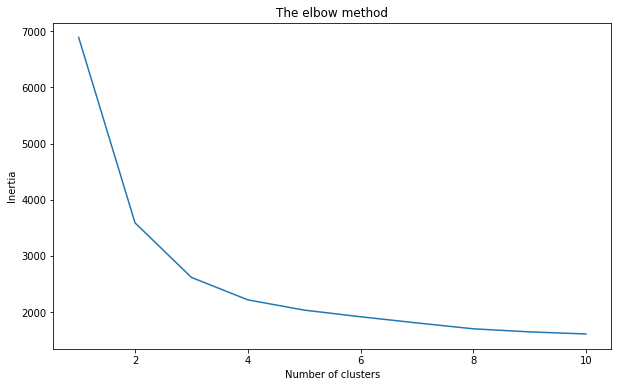

In [21]:
inertia = plot_inertia(scaled_x_df)

In [72]:
def cluster(array, random_state, n_clusters):

    # We build our model assuming three clusters
    k_means = KMeans(n_clusters, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state=check_random_state(0))
    
    clusters = k_means.fit_predict(array)
    
    centroids = k_means.cluster_centers_
   
    labels= clusters
    
    return k_means, clusters, centroids,labels


In [73]:
kmeans, clusters,centroids, labels = cluster(scaled_x_df, random_state=check_random_state(0), n_clusters=4)

In [69]:
clusters

array([1, 1, 2, ..., 3, 3, 3], dtype=int32)

In [35]:
#Display the centroids
print(centroids)

[[2.03244323e-01 4.41794025e-02 3.80682027e-04 4.99242445e-01
  4.42479503e-03 6.45716944e-03 6.77909737e-03 3.49697051e-03
  6.32715755e-03 5.52798981e-03 5.42607186e-03 7.49235182e-03
  4.13578226e-03 9.84180661e-03 9.46568255e-04 1.04911012e-02
  8.61587315e-03 1.00025229e-02 4.45216152e-03 5.32073776e-03
  9.15312031e-03 1.89837248e-03 4.55456124e-03 6.70348930e-03
  9.88189051e-03 4.84086947e-03 8.19725943e-03 3.80659810e-03
  6.67824229e-04 9.36861989e-03 5.28463173e-03 8.86336316e-03
  8.38544386e-03 5.76271598e-03 3.62619830e-03 2.48068927e-03
  6.18592603e-03 2.10480713e-03 4.36897935e-03 1.99067719e-04
  2.15681050e-03 1.91994093e-03 2.97469948e-03 1.02024643e-04
  1.76081039e-04 7.40725553e-03 8.35396778e-03 6.84042557e-03
  4.67470952e-03 5.91436543e-03 7.70198562e-03 2.25987746e-03
  1.74540001e-03 7.12023679e-03 4.45680145e-05 3.79595247e-03
  8.87910583e-06 2.40409823e-03 7.95976683e-04 7.21669145e-03
  4.70371563e-03 4.22718454e-03 8.39392212e-03 3.64208725e-04
  1.3139

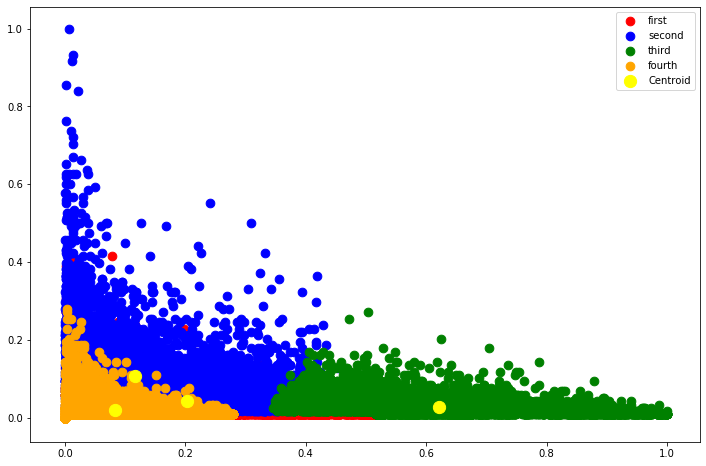

In [30]:
x=scaled_x_df.values

y_kmeans = clusters


plt.figure(figsize=(12,8))


#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'first')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'second')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'third')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 75, 
            c = 'orange', label = 'fourth')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 150, 
            c = 'yellow', label = 'Centroid')


plt.legend()

#### Make copy of data and insert the labels to the data

In [ ]:
new_df=df
new_df["cluster"]=labels

### I have to take a look at statistics of different clusters to assign recommendations

In [58]:
new_df.groupby(["cluster"]).mean()
#ignore id field

,id,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost
cluster,,,,,,,,,,,,,,,,,,,,,
0,8.395572e+06,500.326522,5.209936,202.781110,1228.750134,0.482238,0.187099,0.332131,0.076923,0.221287,...,0.017070,5.566794,3.458439,8.444207,6.674425,0.878704,16.391827,3.026806,36.654268,13.653990
1,4.633955e+06,285.782168,12.569635,580.988947,2200.776639,1.419767,0.561226,0.735975,0.249280,0.694505,...,0.049839,16.370652,7.937351,16.720940,8.240951,4.367592,41.088123,3.224883,45.728267,13.969593
2,5.247729e+06,1529.334179,3.364427,130.267165,2001.976816,0.307010,0.165550,0.147256,0.063757,0.186923,...,0.017910,5.252281,1.761859,5.888113,1.412921,1.704635,9.901648,2.944049,39.708856,14.426904
3,1.210461e+07,205.425767,2.455793,100.800944,360.665724,0.190468,0.041836,0.193712,0.036597,0.089911,...,0.003148,1.327945,1.761233,3.524751,6.125615,0.566423,7.806704,2.963049,38.446739,14.101115


In [59]:
new_df.groupby(["cluster"]).median()
#ignore id field

,id,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost
cluster,,,,,,,,,,,,,,,,,,,,,
0,8369742,460,4,112.236633,1259,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,10,2.600000,27.395830,9.969767
1,4416090,215,10,321.909912,2245,1,0,0,0,0,...,0.0,5.949997,0.0,0.0,0.0,0.0,28,2.756098,31.038574,10.792761
2,5063957,1448,3,83.212708,2089,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,6,2.500000,30.575241,11.785268
3,13610040,179,2,44.749969,335,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,4,2.500000,23.899994,8.933568


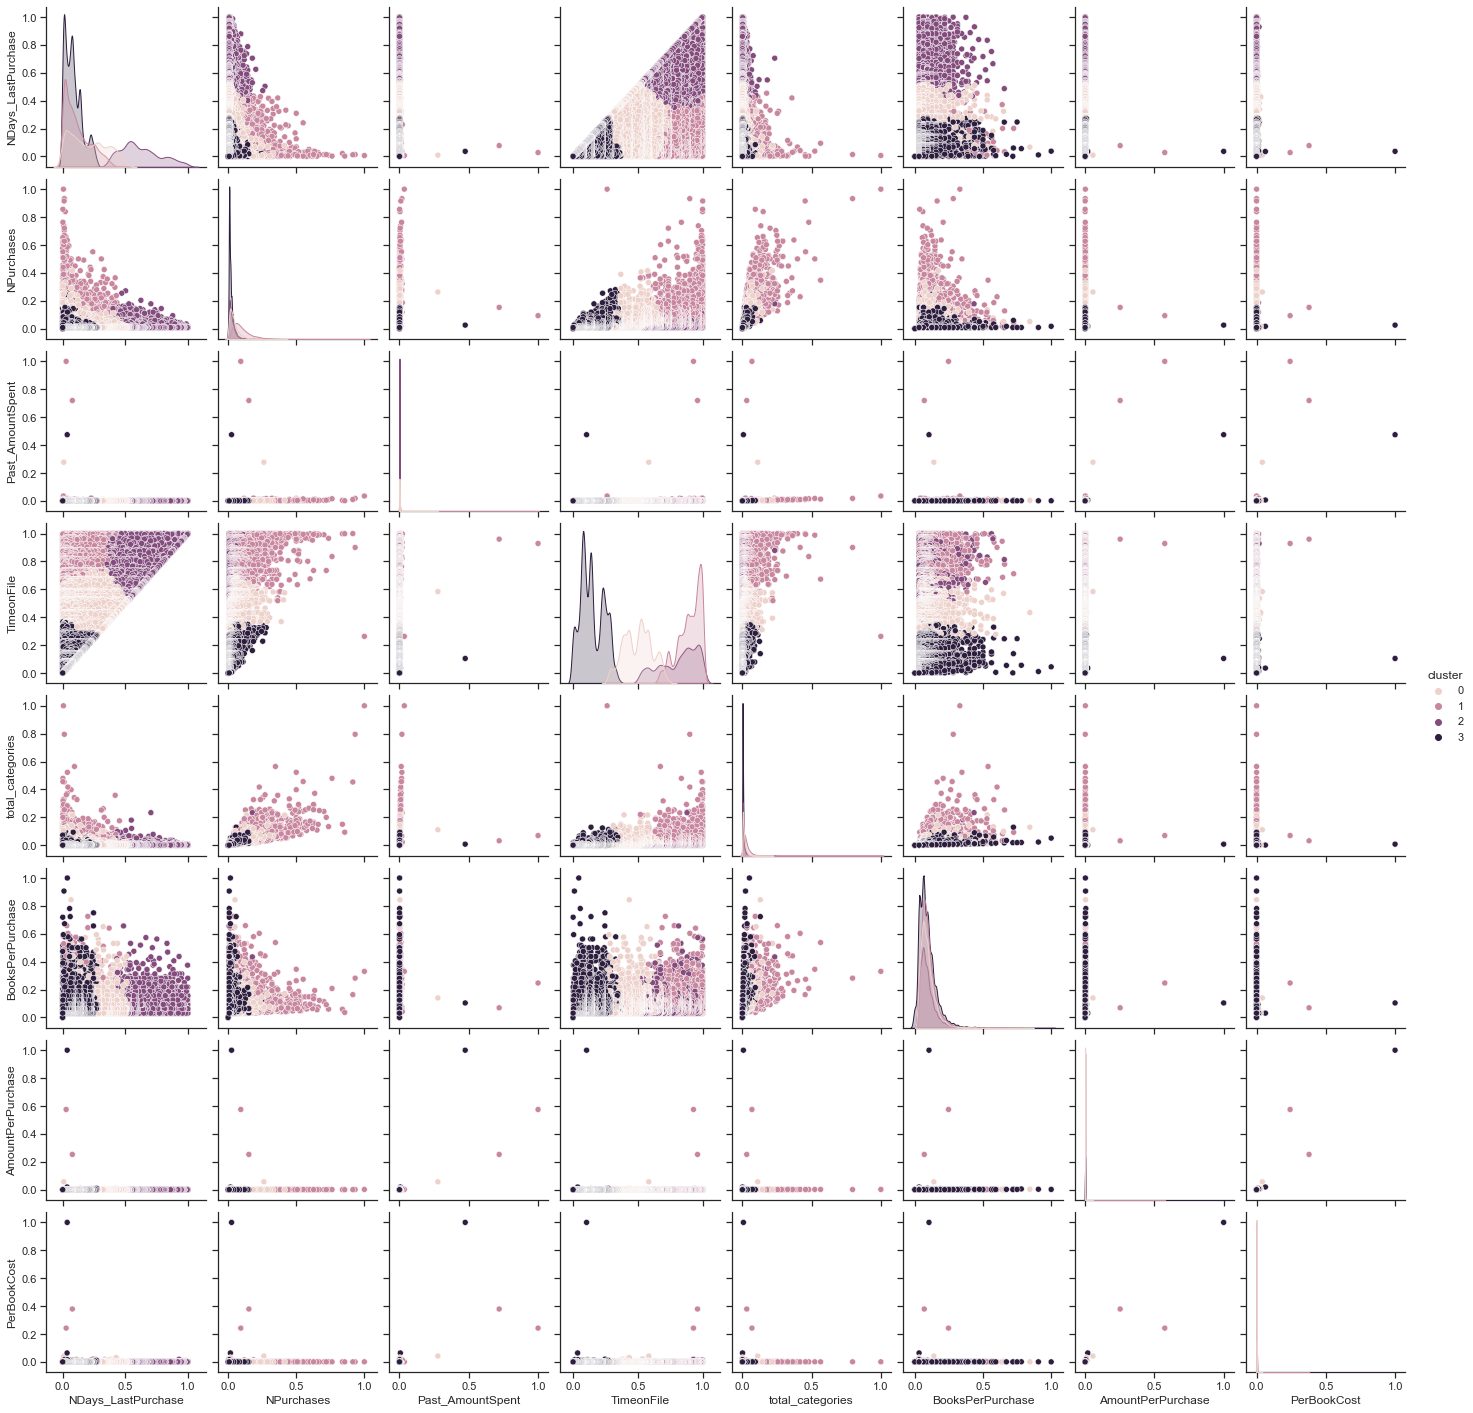

In [87]:
scaled_x_df=pd.DataFrame(scaled_x_df)
scaled_x_df["cluster"]=labels
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(scaled_x_df, hue="cluster",diag_kind="kde",vars=["NDays_LastPurchase", "NPurchases", "Past_AmountSpent",
                                                     "TimeonFile","total_categories","BooksPerPurchase",
                                                    "AmountPerPurchase","PerBookCost"])





### Breakdown and recommendations

I cateogrized the customers based on my analysis results:

- Cluster 0: Lowest spending, new customers. I will cateogrize this customer type as "New_Customer"

- Cluster 1: Most money spent and books purchase. I will cateogrize this customer type as "Target_Customer"

- Cluster 2: Longest holding accounts but don't spend as much. I will cateogrize this customer type as "Hesitant_Customer"

- Cluster 3: Ranks second in most books purchased and money spent. This is an important customer type. I will cateogrize this customer type as "Growth_Customer"

In [157]:
#Get the maximum of the categories, clean the name and categorize as customer favorite
new_df['FavoriteCategory'] = new_df.iloc[:, 5:35].idxmax(axis = 1).str.replace('\d+', '').str.replace('^F', '')

In [150]:
new_df['CustomerType'] = new_df['cluster'].map({0:'New_Customer', 1:'Target_Customer',
                                                2:'Hesitant_Customer', 3:'Growth_Customer'})

#segment a strategy for marketing that targets each of the 4 customer types
new_df['MarketingStratSegmentation'] = new_df['cluster'].map({0:'Promotional_Emails', 1:'Rewards_Program',
                                                              2:'Discount_Program', 3:'Vouchers_and_Credit_Rewards'})



In [155]:
#drop cluster becaause its not necessary anymore for the dataset to be used for marketing strategy analysis
new_df=new_df.drop(["cluster"],1) 

In [158]:
new_df

,id,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost,CustomerType,MarketingStratSegmentation,FavoriteCategory
0,914,194,7,318.894775,1703,1,0,1,0,0,...,0.0,0.000000,0.0,32,4.571429,45.556396,9.965462,Target_Customer,Rewards_Program,conthist
1,957,3,14,368.052246,2364,1,0,2,0,0,...,10.0,0.000000,0.0,34,2.428571,26.289446,10.825066,Target_Customer,Rewards_Program,health
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.0,0.000000,0.0,35,2.333333,28.219889,12.094238,Hesitant_Customer,Discount_Program,conthist
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.0,0.000000,0.0,7,1.750000,17.804260,10.173863,New_Customer,Promotional_Emails,conthist
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,0.0,61.799988,0.0,39,6.500000,73.773031,11.349697,Target_Customer,Rewards_Program,conthist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33708,16061594,6,1,0.000000,6,0,0,0,0,0,...,0.0,0.000000,0.0,1,1.000000,0.000000,0.000000,Growth_Customer,Vouchers_and_Credit_Rewards,nonbooks
33709,16062701,4,1,0.000000,4,0,0,0,0,0,...,0.0,0.000000,0.0,1,1.000000,0.000000,0.000000,Growth_Customer,Vouchers_and_Credit_Rewards,nonbooks
33710,16062981,5,1,22.949997,5,0,0,3,0,0,...,0.0,0.000000,0.0,4,4.000000,22.949997,5.737499,Growth_Customer,Vouchers_and_Credit_Rewards,cartoons
33711,16063490,0,0,0.000000,0,0,0,0,0,0,...,0.0,0.000000,0.0,0,0.000000,0.000000,0.000000,Growth_Customer,Vouchers_and_Credit_Rewards,fiction


In [196]:
new_df[["id","FavoriteCategory", "CustomerType","MarketingStratSegmentation"]]

,id,FavoriteCategory,CustomerType,MarketingStratSegmentation
0,914,conthist,Target_Customer,Rewards_Program
1,957,health,Target_Customer,Rewards_Program
2,1406,conthist,Hesitant_Customer,Discount_Program
3,1414,conthist,New_Customer,Promotional_Emails
4,1546,conthist,Target_Customer,Rewards_Program
...,...,...,...,...
33708,16061594,nonbooks,Growth_Customer,Vouchers_and_Credit_Rewards
33709,16062701,nonbooks,Growth_Customer,Vouchers_and_Credit_Rewards
33710,16062981,cartoons,Growth_Customer,Vouchers_and_Credit_Rewards
33711,16063490,fiction,Growth_Customer,Vouchers_and_Credit_Rewards


In [159]:
#get the count of types of customers 
new_df['CustomerType'].value_counts()

Growth_Customer      12023
Target_Customer       8681
New_Customer          7488
Hesitant_Customer     5521
Name: CustomerType, dtype: int64

### Testing recommendations on the test data

In [168]:
test_df=pd.read_excel('test_data.xlsx')

In [169]:
# Drop logtarg
test_df = test_df.drop('logtarg', axis=1)

In [162]:
# Descriptive statistics
test_df.describe()

,id,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,...,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,182.800000,30.900000,393.824618,1133.400000,0.900000,0.500000,0.300000,0.300000,0.0,...,45.489037,2.179726,7.299717,0.0,0.0,11.412562,2.747357,8.395408,3.719026,1.475000
std,3.02765,142.972258,25.575379,345.948491,430.718057,1.100505,1.581139,0.674949,0.483046,0.0,...,84.660464,3.710997,18.086156,0.0,0.0,32.699389,4.519334,16.454126,7.868316,4.664359
min,1.00000,28.000000,7.000000,39.299990,331.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.25000,92.250000,11.750000,120.855076,940.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.50000,149.000000,27.000000,283.546948,1075.500000,0.500000,0.000000,0.000000,0.000000,0.0,...,4.248833,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.75000,200.750000,36.000000,601.957790,1334.500000,1.750000,0.000000,0.000000,0.750000,0.0,...,52.050600,3.642952,3.750000,0.0,0.0,0.000000,5.174998,3.757994,0.000000,0.000000
max,10.00000,443.000000,89.000000,958.284761,1988.000000,3.000000,5.000000,2.000000,1.000000,0.0,...,265.297852,9.949997,57.873596,0.0,0.0,104.038269,10.449997,39.880737,20.000000,14.749997


In [170]:
#rename the columns 

test_df.rename(columns={'r': 'NDays_LastPurchase', 'f': 'NPurchases','m': 'Past_AmountSpent','tof': 'TimeonFile'}, inplace=True)


In [171]:
# Number of book categories bought
test_df['total_categories'] = (test_df.loc[:, 'Ffiction1':'Fnonbooks99']).sum(axis = 1)
test_df['total_categories'] = test_df['total_categories'].fillna(0)

#average book purchase
test_df["BooksPerPurchase"]=test_df['total_categories']/test_df['NPurchases']
test_df['BooksPerPurchase'] = test_df['BooksPerPurchase'].fillna(0)


#amount spent per purchase
test_df["AmountPerPurchase"]=test_df['Past_AmountSpent']/test_df['NPurchases']
test_df['AmountPerPurchase'] = test_df['AmountPerPurchase'].fillna(0)

#get average cost per book
test_df["PerBookCost"]=test_df['Past_AmountSpent']/test_df['total_categories']
test_df['PerBookCost'] = test_df['PerBookCost'].fillna(0)

In [172]:
x_test = test_df.drop(["id"],1)   
y_test = test_df["id"]

In [173]:
scaled_x_test_df = standardize(x_test)

In [174]:
scaled_x_test_df

,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost
0,0.356627,0.012195,0.000000,0.420036,0.666667,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.011494,0.000000,0.000000,0.000000
1,0.144578,0.000000,0.017844,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.217686,0.226695
2,0.954217,0.195122,0.281762,0.343995,0.000000,0.0,0.0,1.0,0.0,0.142857,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,1.000000,0.575903,0.522495
3,0.265060,0.048780,0.088465,0.468316,0.000000,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.000000,1.000000,0.000000,1.000000,1.0,0.045977,0.000000,0.432660,0.450567
4,0.069880,0.365854,0.541511,0.512372,0.000000,0.0,0.0,0.0,0.0,0.285714,...,0.0,0.000000,0.000000,0.979487,0.000000,0.0,0.344828,0.000000,0.686389,0.714797
5,0.318072,1.000000,1.000000,0.430296,0.666667,0.0,0.5,0.0,0.0,1.000000,...,0.0,0.096958,0.000000,0.000000,0.000000,0.0,1.000000,0.646067,0.418633,0.393313
6,0.436145,0.597561,0.952979,0.350030,1.000000,1.0,1.0,1.0,0.0,0.285714,...,0.0,0.000000,0.660287,0.125641,0.000000,0.0,0.586207,0.410714,0.817145,0.809008
7,0.000000,0.085366,0.089585,0.680748,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.080460,0.000000,0.269937,0.281109
8,1.000000,0.292683,0.249797,0.636693,0.333333,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.000000,0.968763,0.000000,0.859513,0.0,0.287356,0.370968,0.268880,0.259826
9,0.185542,0.317073,0.635843,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.310345,0.348485,1.000000,1.000000


In [176]:
test_clusters=kmeans.predict(scaled_x_test_df)

In [177]:
scaled_x_test_df["clusters"]=test_clusters
scaled_x_test_df

,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,...,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost,clusters
0,0.356627,0.012195,0.000000,0.420036,0.666667,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.011494,0.000000,0.000000,0.000000,0
1,0.144578,0.000000,0.017844,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.217686,0.226695,3
2,0.954217,0.195122,0.281762,0.343995,0.000000,0.0,0.0,1.0,0.0,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,1.000000,0.575903,0.522495,2
3,0.265060,0.048780,0.088465,0.468316,0.000000,0.0,0.0,1.0,0.0,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.0,0.045977,0.000000,0.432660,0.450567,0
4,0.069880,0.365854,0.541511,0.512372,0.000000,0.0,0.0,0.0,0.0,0.285714,...,0.000000,0.000000,0.979487,0.000000,0.0,0.344828,0.000000,0.686389,0.714797,1
5,0.318072,1.000000,1.000000,0.430296,0.666667,0.0,0.5,0.0,0.0,1.000000,...,0.096958,0.000000,0.000000,0.000000,0.0,1.000000,0.646067,0.418633,0.393313,1
6,0.436145,0.597561,0.952979,0.350030,1.000000,1.0,1.0,1.0,0.0,0.285714,...,0.000000,0.660287,0.125641,0.000000,0.0,0.586207,0.410714,0.817145,0.809008,1
7,0.000000,0.085366,0.089585,0.680748,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.080460,0.000000,0.269937,0.281109,1
8,1.000000,0.292683,0.249797,0.636693,0.333333,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.968763,0.000000,0.859513,0.0,0.287356,0.370968,0.268880,0.259826,2
9,0.185542,0.317073,0.635843,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.310345,0.348485,1.000000,1.000000,1


In [181]:
test_df["cluster"]=test_clusters

### Test recommendations

In [182]:
#Get the maximum of the categories, clean the name and categorize as customer favorite
test_df['FavoriteCategory'] = test_df.iloc[:, 5:35].idxmax(axis = 1).str.replace('\d+', '').str.replace('^F', '')

In [183]:
test_df['CustomerType'] = test_df['cluster'].map({0:'New_Customer', 1:'Target_Customer',
                                                2:'Hesitant_Customer', 3:'Growth_Customer'})

#segment a strategy for marketing that targets each of the 4 customer types
test_df['MarketingStratSegmentation'] = test_df['cluster'].map({0:'Promotional_Emails', 1:'Rewards_Program',
                                                              2:'Discount_Program', 3:'Vouchers_and_Credit_Rewards'})



In [187]:
#drop cluster becaause its not necessary anymore for the dataset to be used for marketing strategy analysis
test_df=test_df.drop(["cluster"],1) 

In [188]:
test_df

,id,NDays_LastPurchase,NPurchases,Past_AmountSpent,TimeonFile,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Mencyclopaedia44,Mvideos50,Mnonbooks99,total_categories,BooksPerPurchase,AmountPerPurchase,PerBookCost,FavoriteCategory,CustomerType,MarketingStratSegmentation
0,1,176,8,39.299990,1027,2,0,0,0,0,...,0.000000,0.000000,0.000000,8,1.000000,4.912499,4.912499,music,New_Customer,Promotional_Emails
1,2,88,7,55.698441,331,1,0,0,0,0,...,0.000000,0.000000,0.000000,7,1.000000,7.956920,7.956920,travelguides,Growth_Customer,Vouchers_and_Credit_Rewards
2,3,424,23,298.234560,901,0,0,0,1,0,...,0.000000,0.000000,0.000000,25,1.086957,12.966720,11.929382,conthist,Hesitant_Customer,Discount_Program
3,4,138,11,120.597641,1107,0,0,0,1,0,...,0.000000,20.000000,14.749997,11,1.000000,10.963422,10.963422,music,New_Customer,Promotional_Emails
4,5,57,37,536.940781,1180,0,0,0,0,0,...,39.062683,0.000000,0.000000,37,1.000000,14.511913,14.511913,conthist,Target_Customer,Rewards_Program
5,6,160,89,958.284761,1044,2,0,1,0,0,...,0.000000,0.000000,0.000000,94,1.056180,10.767245,10.194519,health,Target_Customer,Rewards_Program
6,7,209,56,915.073158,911,3,5,2,1,0,...,5.010658,0.000000,0.000000,58,1.035714,16.340592,15.777123,music,Target_Customer,Rewards_Program
7,8,28,14,121.627380,1459,0,0,0,0,0,...,0.000000,0.000000,0.000000,14,1.000000,8.687670,8.687670,health,Target_Customer,Rewards_Program
8,9,443,31,268.859337,1386,1,0,0,0,0,...,0.000000,17.190262,0.000000,32,1.032258,8.672882,8.401854,music,Hesitant_Customer,Discount_Program
9,10,105,33,623.630127,1988,0,0,0,0,0,...,39.880737,0.000000,0.000000,34,1.030303,18.897883,18.342063,history,Target_Customer,Rewards_Program


In [195]:
test_df[["id","FavoriteCategory", "CustomerType","MarketingStratSegmentation"]]

,id,FavoriteCategory,CustomerType,MarketingStratSegmentation
0,1,music,New_Customer,Promotional_Emails
1,2,travelguides,Growth_Customer,Vouchers_and_Credit_Rewards
2,3,conthist,Hesitant_Customer,Discount_Program
3,4,music,New_Customer,Promotional_Emails
4,5,conthist,Target_Customer,Rewards_Program
5,6,health,Target_Customer,Rewards_Program
6,7,music,Target_Customer,Rewards_Program
7,8,health,Target_Customer,Rewards_Program
8,9,music,Hesitant_Customer,Discount_Program
9,10,history,Target_Customer,Rewards_Program
